##  Name:  Anjani Bonda
##  Assignment:  Week 6 (Part2)
##  Date:  July 17, 2022

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import the data as a data frame and ensure it is loaded correctly.

In [3]:
df = pd.read_csv("mushrooms.csv")

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
# Transpose for better view.
df.head().T

,0,1,2,3,4
class,p,e,e,p,e
cap-shape,x,x,b,x,x
cap-surface,s,s,s,y,s
cap-color,n,y,w,w,g
bruises,t,t,t,t,f
odor,p,a,l,p,n
gill-attachment,f,f,f,f,f
gill-spacing,c,c,c,c,w
gill-size,n,b,b,n,b
gill-color,k,k,n,n,k


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

#### Convert the categorical features (all of them) to dummy variables.

In [8]:
df = pd.get_dummies(df,drop_first=True)

In [9]:
df.head().T

,0,1,2,3,4
class_p,1,0,0,1,0
cap-shape_c,0,0,0,0,0
cap-shape_f,0,0,0,0,0
cap-shape_k,0,0,0,0,0
cap-shape_s,0,0,0,0,0
...,...,...,...,...,...
habitat_l,0,0,0,0,0
habitat_m,0,0,1,0,0
habitat_p,0,0,0,0,0
habitat_u,1,0,0,1,0


In [10]:
df.shape

(8124, 96)

#### Split the data into a training and test set.

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x = df.drop('class_p',axis=1)
y = df['class_p']

In [13]:
x.shape,y.shape

((8124, 95), (8124,))

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

#### Fit a decision tree classifier on the training set.

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
# Instantiate the model
model = DecisionTreeClassifier()

In [17]:
# fit the model on the training set
model.fit(x_train,y_train)

DecisionTreeClassifier()

#### Report the accuracy and create a confusion matrix for the model prediction on the test set.

In [18]:
from sklearn.metrics import confusion_matrix,classification_report

In [19]:
# Accuracy score
model.score(x_test,y_test)

1.0

In [20]:
y_pred = model.predict(x_test)

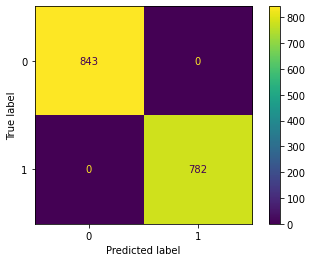

In [21]:
# Plot the confusion matrix
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix
plot_confusion_matrix(model,x_test,y_test)

In [22]:
# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



#### Create a visualization of the decision tree.

In [23]:
from sklearn.tree import plot_tree

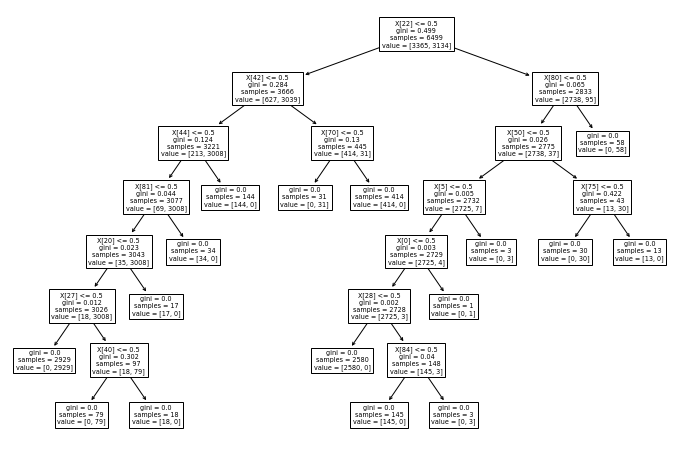

In [24]:
plt.figure(figsize=(12,8))
plot_tree(model);

#### Use a χ2-statistic selector to pick the five best features for this data (see section 10.4 of the Machine Learning with Python Cookbook).

In [25]:
from sklearn.feature_selection import chi2, f_classif
from sklearn.feature_selection import SelectKBest

In [26]:
chi2_selector = SelectKBest(chi2,k=5)

In [27]:
best_5_features = chi2_selector.fit_transform(x_train,y_train)

In [28]:
#  Show the results
print("Original number of features:",x_train.shape[1])
print("Reduced number of features:",best_5_features.shape[1])

Original number of features: 95
Reduced number of features: 5


#### Which five features were selected in step 7? Hint: Use the get_support function.

In [30]:
from numpy import array

In [31]:
feature_mask = np.array(chi2_selector.get_support())
feature_names = np.array(x_train.columns.tolist())
selected_features = list(feature_names[feature_mask])

In [32]:
selected_features

['odor_f',
 'odor_n',
 'gill-size_n',
 'stalk-surface-above-ring_k',
 'stalk-surface-below-ring_k']

#### Repeat steps 4 and 5 with the five best features selected in step 7.

In [33]:
data = df[['odor_f','odor_n','gill-size_n','stalk-surface-above-ring_k','stalk-surface-below-ring_k']]

In [34]:
data.head()

,odor_f,odor_n,gill-size_n,stalk-surface-above-ring_k,stalk-surface-below-ring_k
0,0,0,1,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,1,0,0
4,0,1,0,0,0


In [35]:
target = df['class_p']

In [36]:
xc = data
yc = target

In [37]:
# Split data and target to training and test set
xc_train, xc_test, yc_train, yc_test = train_test_split(xc, yc, test_size=0.20, random_state=42)

In [38]:
DT = DecisionTreeClassifier()
DT.fit(xc_train,yc_train)

DecisionTreeClassifier()

In [41]:
# Report the accuracy score and create a confusion matrix
DT.score(xc_test,yc_test)

0.9735384615384616

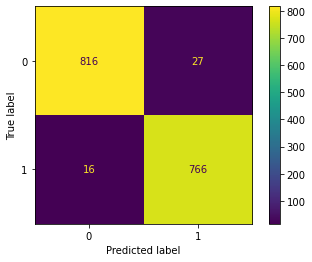

In [42]:
plot_confusion_matrix(DT,xc_test,yc_test)

### Summarize your findings.

The initial model utilized 96 features to predict the target variable and achieved a 100% classification. However, Five of these features produced 97% accuracy. This shows that optimal feature selection is a very important step in building models since it optimizes computing power and eliminates overfitting.